## Data analysis - Vaccines 

Questions 
  - Em que momento houve maior distribuição de vacinas 
  - Porcentagem de homens e mulheres que tomaram vacinas por idade 

In [11]:
import pandas as pd 

vaccines_df = pd.read_csv('../data/campinas_2021_22_23_vaccines.csv')
vaccines_df['date'] = pd.to_datetime(vaccines_df['date'])
vaccines_2021_df = vaccines_df[vaccines_df['date'].dt.year == 2021]
vaccines_df.head()



,date,state,city,ibgeID,dose,vaccine,sex,age,count,pop2021
0,2021-01-17,SP,Campinas/SP,3509502,1,Sinovac,F,25-29,1,1223237
1,2021-01-17,SP,Campinas/SP,3509502,1,Sinovac,F,50-54,1,1223237
2,2021-01-17,SP,Campinas/SP,3509502,2,Pfizer/BioNTech,F,20-24,1,1223237
3,2021-01-17,SP,Campinas/SP,3509502,2,Sinovac,F,55-59,1,1223237
4,2021-01-18,SP,Campinas/SP,3509502,1,Sinovac,F,20-24,1,1223237


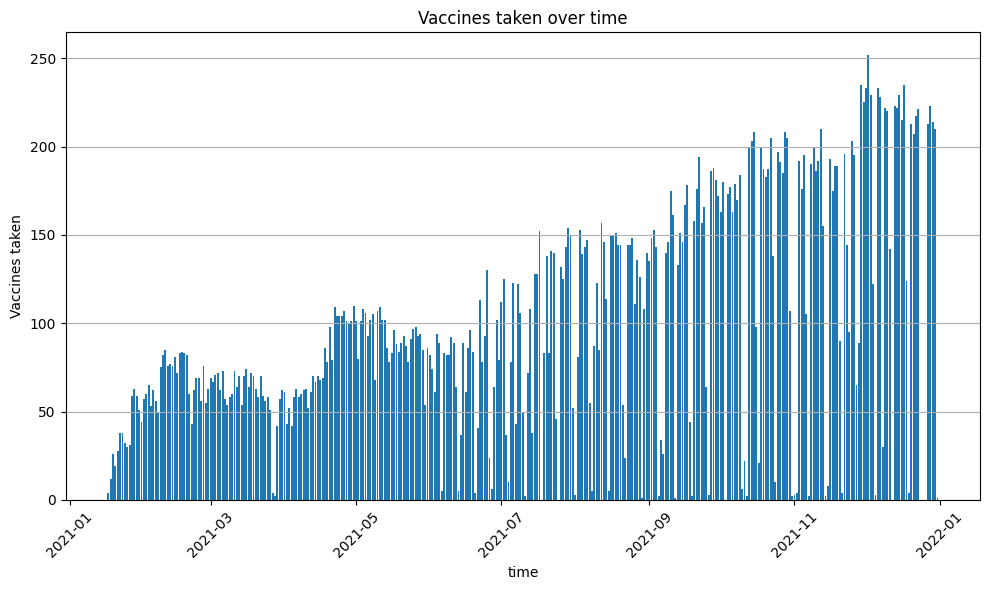

In [12]:
import matplotlib.pyplot as plt 

date = pd.to_datetime(vaccines_2021_df['date'])
date_counts = vaccines_2021_df['date'].value_counts().reset_index()
date_counts.columns = ['date', 'count']

date_counts = date_counts.sort_values(by='date')


plt.figure(figsize=(10, 6))
plt.bar(date_counts['date'], date_counts['count'], width=0.8, align='center')

plt.title('Vaccines taken over time')
plt.xlabel('time')
plt.ylabel('Vaccines taken')
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
import plotly.express as px 


fig = px.line(date_counts, x='date', y='count', title='Vaccines taked over time')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Count')


C:\Users\barsj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'date=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2021, 1, 17, 0, 0),
                          datetime.datetime(2021, 1, 18, 0, 0),
                          datetime.datetime(2021, 1, 19, 0, 0), ...,
                          datetime.datetime(2021, 12, 29, 0, 0),
                          datetime.datetime(2021, 12, 30, 0, 0),
                          datetime.datetime(2021, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([  4,  12,  26, ..., 214, 210,   1], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Vaccines taked over time'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}}}
})

In [ ]:
vaccine_types = vaccines_2021_df['vaccine'].value_counts().reset_index()
vaccine_types.columns = ['vaccine_type', 'count']
vaccine_types['vaccine_types_percentage'] = (vaccine_types['count'] / vaccine_types['count'].sum()) * 100

fig = px.bar(vaccine_types, names='vaccine_type', values='vaccine_types_percentage', title='Distribuição dos tipos de vacinas')
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

NameError: name 'vaccines_2021_df' is not defined

/var/folders/hh/vv4mkd7s6j184723q_ml7r5423gckk/T/ipykernel_8569/3176583724.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



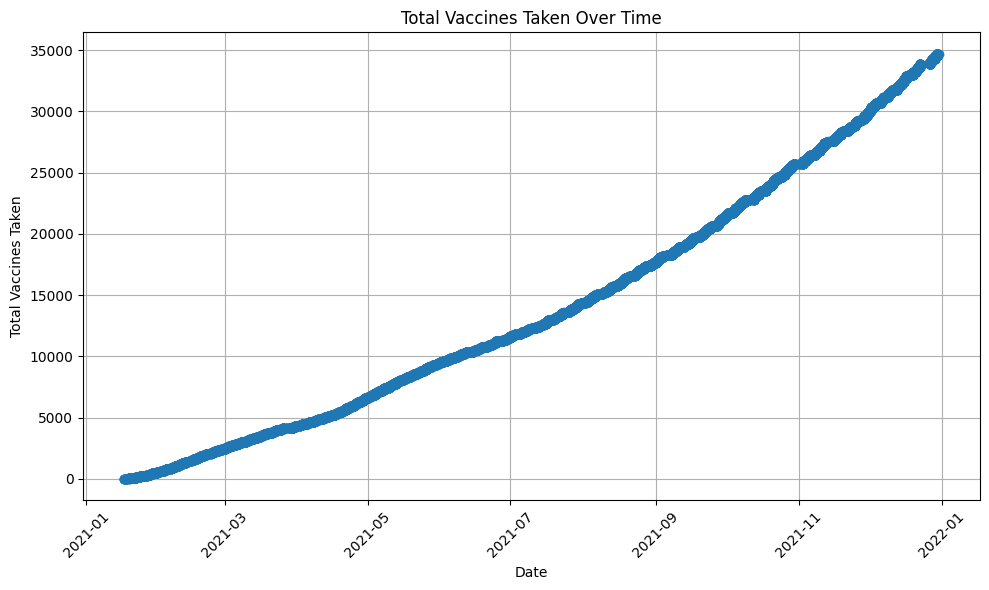

In [ ]:
# TODO: see this 
vaccines_2021_df['total_vaccines'] = range(1, len(vaccines_2021_df) + 1)
vaccines_2021_df.head()

plt.figure(figsize=(10, 6))
plt.plot(vaccines_2021_df['date'], vaccines_2021_df['total_vaccines'], marker='o', linestyle='-')
plt.title('% Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% Vaccinated')
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()